In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import timm
import torch

from src.model.quadtree_embedding import QuadtreeEmbedding

In [11]:
backbone = timm.create_model('resnet18', pretrained=True)
batch_size = 1
img_size = 512
splitter_hidden_size = 64
patch_size = 64
se = QuadtreeEmbedding(backbone, splitter_hidden_size=splitter_hidden_size, patch_size=patch_size)

In [12]:
x = torch.randn(batch_size, 3, img_size, img_size)
y, y_map = se(x, True)
y.shape, y_map.shape

(torch.Size([1, 1000, 8, 8]), torch.Size([1, 1, 8, 8]))

In [13]:
y_map = y_map.numpy().squeeze()

In [14]:
y_map

array([[ 1.,  2.,  5.,  6., 17., 18., 21., 22.],
       [ 3.,  4.,  7.,  8., 19., 20., 23., 24.],
       [ 9., 10., 13., 14., 25., 26., 29., 30.],
       [11., 12., 15., 16., 27., 28., 31., 32.],
       [33., 34., 37., 38., 49., 50., 53., 54.],
       [35., 36., 39., 40., 51., 52., 55., 56.],
       [41., 42., 45., 46., 57., 58., 61., 62.],
       [43., 44., 47., 48., 59., 60., 63., 64.]], dtype=float32)

In [15]:
np.unique(y_map)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.],
      dtype=float32)

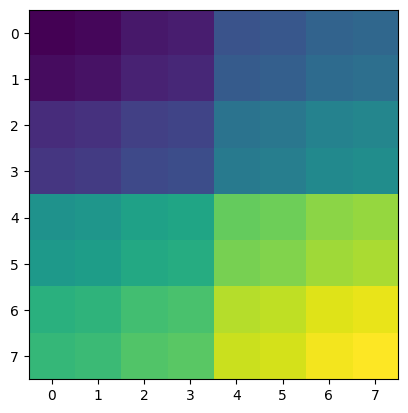

In [16]:
plt.imshow(y_map)